In [1]:
# This notebok follows https://colab.research.google.com/github/tensorflow/tflite-micro/blob/main/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb

from pathlib import Path

MODELS_DIR = Path('./models')
MODELS_DIR.mkdir(exist_ok=True)
MODEL_TF = MODELS_DIR / 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR / 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR / 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR / 'model.cc'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
seed = 0xdeadbeef
np.random.seed(seed)
tf.random.set_seed(seed)

[2.7986479 9.712468  7.914368  2.7459517 9.425042  7.027211  2.2453017
 8.095464  7.5136833 7.73032  ]


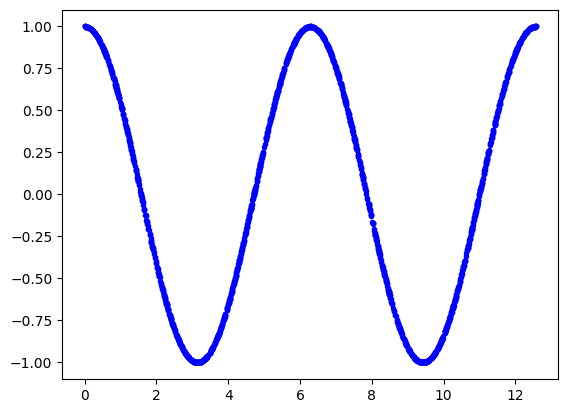

In [4]:
SAMPLES = 2000

x_values = np.random.uniform(low=0, high=4*math.pi, size=SAMPLES).astype(np.float32)
print(x_values[:10])
y_values = np.cos(x_values).astype(np.float32)
plt.plot(x_values, y_values, 'b.')
plt.show()

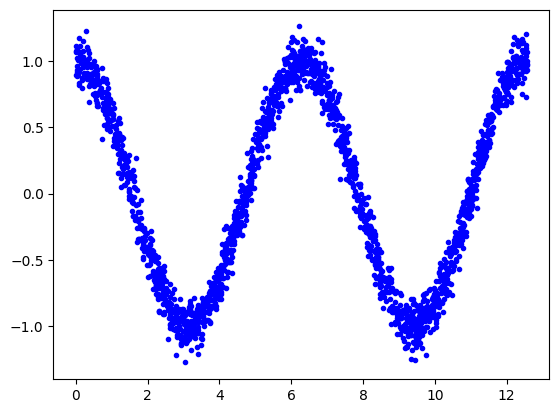

In [5]:
# add noise
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

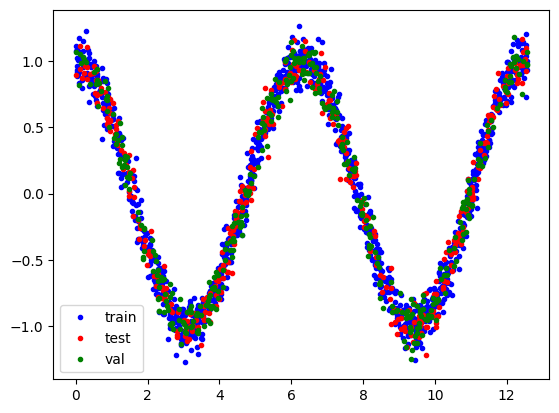

In [6]:
x_train, x_test, x_val = np.split(x_values, [int(0.6*SAMPLES), int(0.8*SAMPLES)])
y_train, y_test, y_val = np.split(y_values, [int(0.6*SAMPLES), int(0.8*SAMPLES)])

plt.plot(x_train, y_train, 'b.', label='train')
plt.plot(x_test, y_test, 'r.', label='test')
plt.plot(x_val, y_val, 'g.', label='val')
plt.legend()
plt.show()

In [20]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(16, input_shape=(1,), activation='relu'))
model1.add(keras.layers.Dense(1))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
hisory1 = model1.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/500


2023-02-12 22:15:13.903366: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19/19 [==============================] - 0s 6ms/step - loss: 2.5282 - mae: 1.3439 - val_loss: 1.9732 - val_mae: 1.1815
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 1.4824 - mae: 1.0033 - val_loss: 1.1579 - val_mae: 0.8938
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 0.9534 - mae: 0.8070 - val_loss: 0.7641 - val_mae: 0.7240
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 0.6924 - mae: 0.7031 - val_loss: 0.5738 - val_mae: 0.6392
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5760 - mae: 0.6606 - val_loss: 0.4941 - val_mae: 0.6086
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5312 - mae: 0.6452 - val_loss: 0.4686 - val_mae: 0.5995
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5191 - mae: 0.6413 - val_loss: 0.4606 - val_mae: 0.5968
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5166 - mae: 0.6406 -

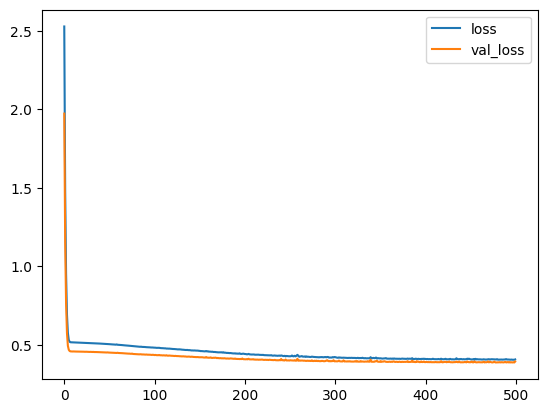

In [23]:
plt.plot(range(500), hisory1.history['loss'], label='loss')
plt.plot(range(500), hisory1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 450us/step


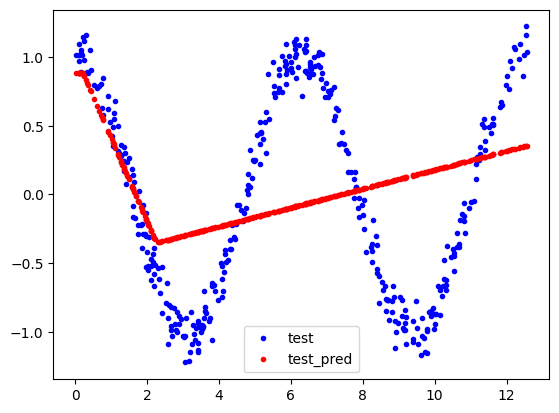

In [24]:
test_loss, test_mae = model1.evaluate(x_test, y_test)
y_test_pred = model1.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='test')
plt.plot(x_test, y_test_pred, 'r.', label='test_pred')
plt.legend()
plt.show()

In [31]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_val, y_val))
model.save(MODEL_TF)

Epoch 1/500
19/19 [==============================] - 0s 5ms/step - loss: 0.5795 - mae: 0.6658 - val_loss: 0.4603 - val_mae: 0.5970
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5177 - mae: 0.6425 - val_loss: 0.4560 - val_mae: 0.5952
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5087 - mae: 0.6358 - val_loss: 0.4583 - val_mae: 0.5957
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5062 - mae: 0.6347 - val_loss: 0.4518 - val_mae: 0.5917
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4968 - mae: 0.6286 - val_loss: 0.4491 - val_mae: 0.5895
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.4891 - mae: 0.6228 - val_loss: 0.4390 - val_mae: 0.5824
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 0.4817 - mae: 0.6175 - val_loss: 0.4335 - val_mae: 0.5777
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 0.4768 - m

INFO:tensorflow:Assets written to: models/model/assets


INFO:tensorflow:Assets written to: models/model/assets


13/13 [==============================] - 0s 425us/step


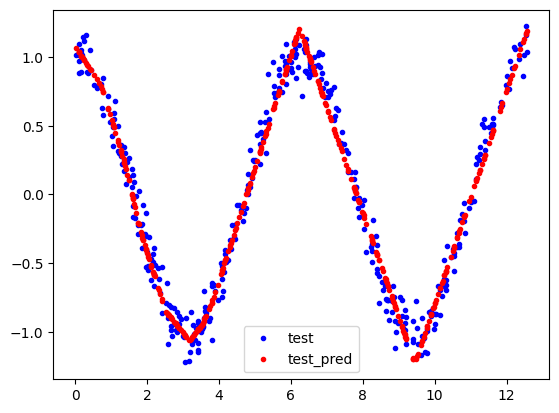

In [33]:
test_loss, test_mae = model.evaluate(x_test, y_test)
y_test_pred = model.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='test')
plt.plot(x_test, y_test_pred, 'r.', label='test_pred')
plt.legend()
plt.show()

In [8]:
converter = tf.lite.TFLiteConverter.from_saved_model(str(MODEL_TF))

tflite_model_no_quant = converter.convert()
MODEL_NO_QUANT_TFLITE.write_bytes(tflite_model_no_quant)

def representative_dataset():
    for i in range(100):
        yield [x_train[i].reshape(1, 1)]


converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()
MODEL_TFLITE.write_bytes(tflite_model)

2023-02-13 23:35:49.579820: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-13 23:35:49.580006: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-13 23:35:49.581507: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: models/model
2023-02-13 23:35:49.582211: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-13 23:35:49.582218: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: models/model
2023-02-13 23:35:49.584150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-02-13 23:35:49.584705: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-13 23:35:49.587575: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-13 23:35:49.633925: I tensorflo

3040